In [3]:
from sklearn import datasets 
import numpy as np 

In [4]:
iris = datasets.load_iris()

In [5]:
import pandas as pd 
iris_df = pd.DataFrame(data=iris['data'], columns=iris['feature_names'])
iris_df['target'] = pd.Series(iris['target_names'][iris['target']], dtype="category")
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [6]:
iris_df.dtypes

sepal length (cm)     float64
sepal width (cm)      float64
petal length (cm)     float64
petal width (cm)      float64
target               category
dtype: object

In [7]:
X = iris_df.loc[:,['petal length (cm)', 'petal width (cm)']].values
y = iris_df.loc[:, 'target'].cat.codes.values

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1, stratify=y)  # stratify means that train and test have the same proportion of labels as original

In [9]:
print("Labels counts in y:", np.bincount(y))
print("Labels counts in y_train:", np.bincount(y_train))
print("Labels counts in y_test:", np.bincount(y_test))

Labels counts in y: [50 50 50]
Labels counts in y_train: [35 35 35]
Labels counts in y_test: [15 15 15]


In [10]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(X_train) # estimate mean and std on train set
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

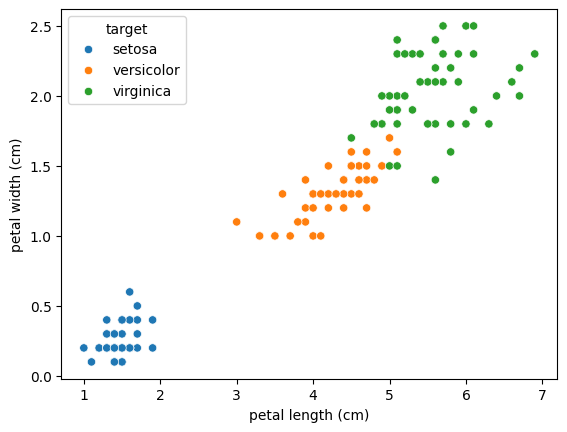

In [11]:
import matplotlib.pyplot as plt 
import seaborn as sns 
sns.scatterplot(data=iris_df, x="petal length (cm)", y="petal width (cm)", hue="target");

In [12]:
train_df, test_df = train_test_split(iris_df, test_size=0.3, stratify=iris_df['target'])
test_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
45,4.8,3.0,1.4,0.3,setosa
57,4.9,2.4,3.3,1.0,versicolor
3,4.6,3.1,1.5,0.2,setosa
144,6.7,3.3,5.7,2.5,virginica
26,5.0,3.4,1.6,0.4,setosa


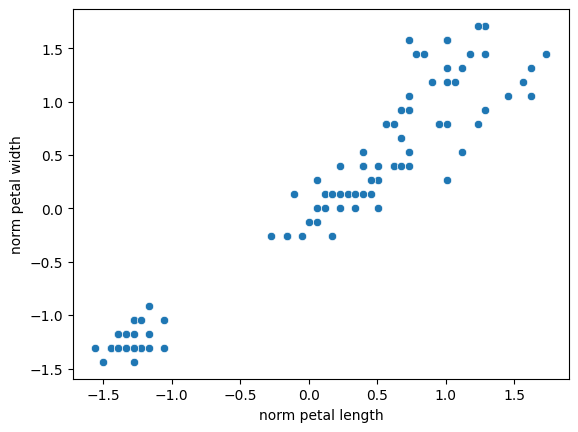

In [13]:
sns.scatterplot(pd.DataFrame({'norm petal length': X_train_std[:, 0], 'norm petal width': X_train_std[:, 1]}), x="norm petal length", y="norm petal width");

In [14]:
from sklearn.linear_model import Perceptron
ppn = Perceptron(eta0=0.1, random_state=1)
ppn.fit(X_train_std, y_train)

Perceptron(eta0=0.1, random_state=1)

In [15]:
y_pred = ppn.predict(X_test_std)
print("Accuracy: %.3f" % (y_pred == y_test).mean())

Accuracy: 0.978


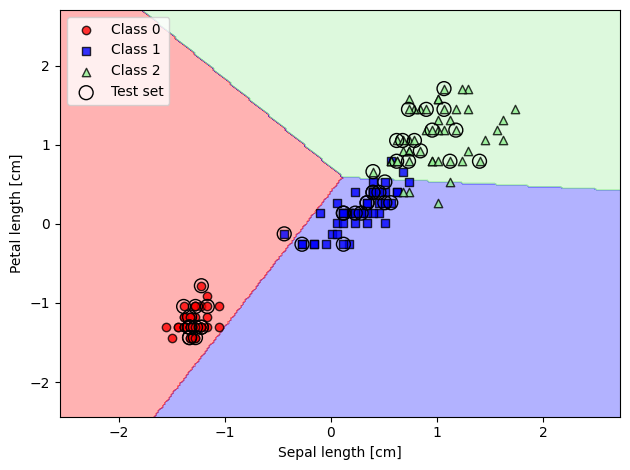

In [16]:
from matplotlib.colors import ListedColormap
def plot_decision_regions(X, y, classifier, test_idx=None, resolution=0.02):
    markers = ('o', 's', '^', '<', '>')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    x1_min, x1_max = X[:,0].min() -1, X[:,0].max() + 1
    x2_min, x2_max = X[:,1].min() -1, X[:,1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    lab = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    lab = lab.reshape(xx1.shape)
    plt.contourf(xx1, xx2, lab, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    for idx, c1 in enumerate(np.unique(y)):
        plt.scatter(x=X[y == c1, 0],
                    y=X[y == c1, 1],
                    alpha=0.8,
                    c=colors[idx],
                    marker=markers[idx],
                    label=f'Class {c1}', 
                    edgecolor="black")
    if test_idx:
        X_test, ytest = X[test_idx, :], y[test_idx]
        plt.scatter(X_test[:, 0], X_test[:, 1],
                    c='none', edgecolor='black', alpha=1.0,
                    linewidth=1, marker='o', s=100, label='Test set')
X_combined_std = np.vstack((X_train_std, X_test_std))
y_combined = np.hstack((y_train, y_test))
plot_decision_regions(X_combined_std, y_combined, ppn, test_idx=range(105,150))
plt.xlabel("Sepal length [cm]")
plt.ylabel("Petal length [cm]")
plt.legend(loc="upper left")
plt.tight_layout()
plt.show()

## SVM classifier
- SVMs can only do binary classification --> sklearn's SVC uses pair-wise binary classification and a majority vote for multinomial classification
- The 'C' parameter penalizes misclassifications, therefore a large C will regularize
- The 'gamma' parameter controls the 'bandwith' of the gaussians and therefore controls the generalization of the model
    - In the limit as $\gamma \rightarrow \infty$, the decision boundary becomes linear
- An SVM classifier corresponds to a 'hinge' loss function, thereby inducing sparse weights 
- It is a non-parametric model that uses all the training samples

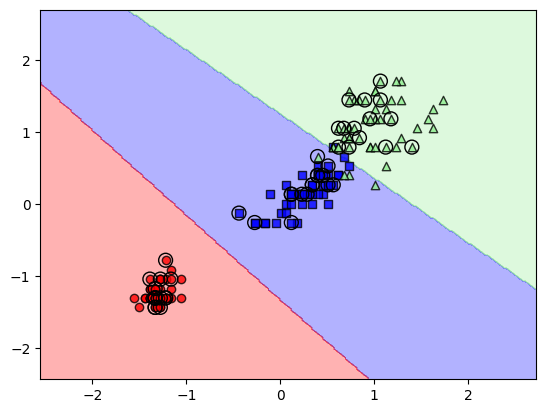

In [17]:
from sklearn.svm import SVC 
svm = SVC(kernel='rbf', random_state=1, gamma=1e-2, C=10.0)
svm.fit(X_train_std, y_train)
plot_decision_regions(X_combined_std, y_combined, svm, test_idx=range(105,150))

## Decision tree
- Doesn't care about normalization, since the tree is split on individual features
- Very flexible: both categorical and quantitative variables are easily added
- It is a non-parametric model that tries to estimate the function itself from data, not the parameters of a function

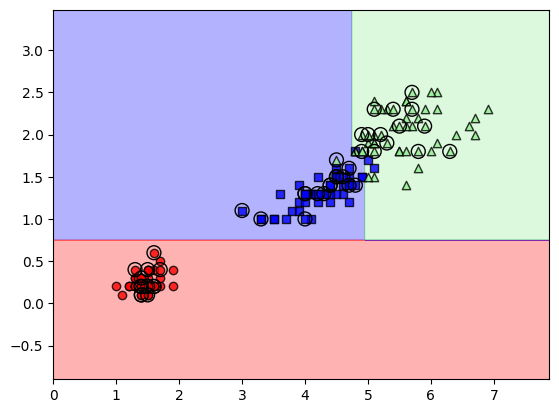

In [18]:
from sklearn.tree import DecisionTreeClassifier
tree_model = DecisionTreeClassifier(criterion='gini', max_depth=4, random_state=1)

tree_model.fit(X_train, y_train)
X_combined = np.concatenate((X_train, X_test), axis=0)
y_combined = np.concatenate((y_train, y_test), axis=0)
plot_decision_regions(X_combined, y_combined, tree_model, test_idx=range(105,150))

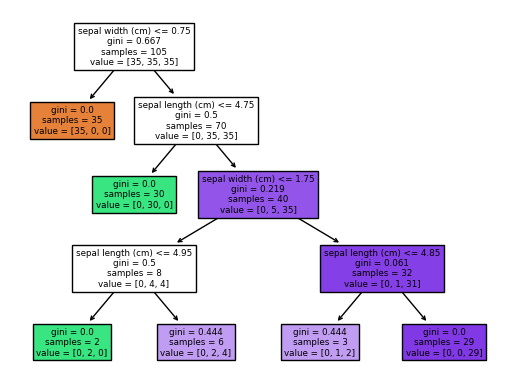

In [20]:
from sklearn import tree 
tree.plot_tree(tree_model, feature_names=iris['feature_names'], filled=True)
plt.show()

## Random forest
A random forest is simply an ensemble of decision trees where a subset of the training examples and a subset of the features is used for each tree. The training examples are picked with replacement wich means that this algoirthm can easily be paralellized
- In sklearn, the number of examples for each tree is by default the whole training set, the number of features however uses a squareroot law
- Due to the large amount of trees, the interpretability is somewhat lost
- Very easy to fit and obtains a good accuracy without much tuning

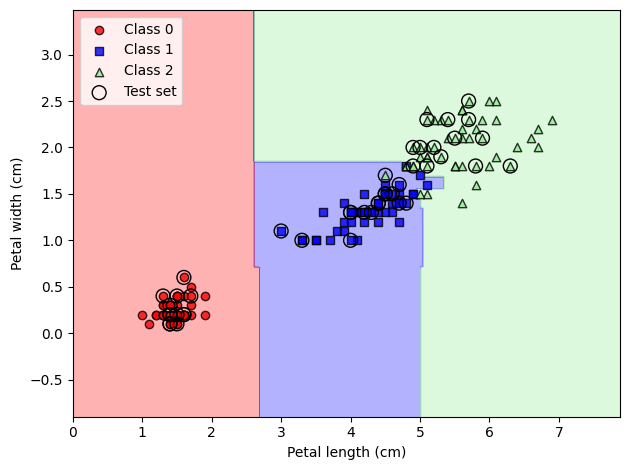

In [21]:
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier(n_estimators=25,
                                random_state=1,
                                n_jobs=5) # run 5 in parallel
forest.fit(X_train, y_train)
plot_decision_regions(X_combined, y_combined, classifier=forest, test_idx=range(105,150))
plt.xlabel('Petal length (cm)')
plt.ylabel('Petal width (cm)')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

## K-nearest neighbors
- Non-parametric model that basically 'memorizes' the whole dataset
- Simply calculates the distance to the K closest neighbors and takes a majority vote
- Bad in high dimensions due to curse of dimensionality: points in high dimensional spaces become exponentially far from each other and it is therefore difficult to interpolate based on far-away points
- Also classifying new examples takes O(N) since a new example needs to be compared to all in the training set
- 

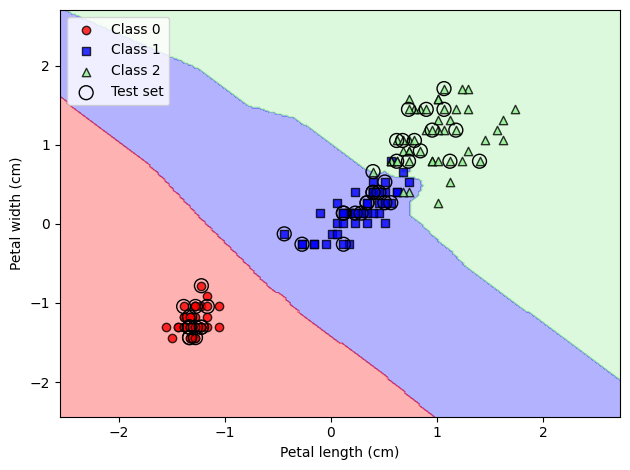

In [23]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5, p=2, metric='minkowski')  # minkowski is just the p-norm
knn.fit(X_train_std, y_train)
plot_decision_regions(X_combined_std, y_combined, classifier=knn, test_idx=range(105,150))
plt.xlabel('Petal length (cm)')
plt.ylabel('Petal width (cm)')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()